# TCN model

To get simulation data run `./run_sim.sh [small, medium, large, test or custom]` from the `leak_model` directory

Then run `gunzip [file_path]` in your terminal for the output of the sim to turn the gz file into a csv

## Loading data

In [158]:
import pandas as pd
import numpy as np
# import math
# import qexpy as q
import matplotlib.pyplot as plt
# import sklearn
# import seaborn as sns
from darts import TimeSeries
# from darts.dataprocessing.transformers import MissingValuesFiller
# from darts.dataprocessing.transformers import Scaler
# from darts.models import TCNModel


In [159]:
# @Adam: Note that I changed this to the smaller dataset I generated
# df = pd.read_csv('../output/synthetic_water_data_minute_1000.csv')
df = pd.read_csv('../output/synthetic_water_data_minute_100.csv')
df.head()

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,l_path_m,pipe_burst_leak,leak_type,leak_category,leak_branch,leak_pipe,c_est_m_per_s,temp_est_c,n_traverses,theta_deg
0,2025-01-01T00:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,NaN,NaN,NaN,1447.321655,10.005531,4,60
1,2025-01-01T00:15:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,NaN,NaN,NaN,1447.321655,10.005531,4,60
2,2025-01-01T00:30:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,NaN,NaN,NaN,1447.321655,10.005531,4,60
3,2025-01-01T00:45:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,NaN,NaN,NaN,1447.321655,10.005531,4,60
4,2025-01-01T01:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,NaN,NaN,NaN,1447.321655,10.005531,4,60


In [160]:
df.describe()

,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_width_in,od_mm,wall_mm,id_mm,l_path_m,c_est_m_per_s,temp_est_c,n_traverses,theta_deg
count,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.000000,864300.0,864300.0
mean,50.500000,2.676000,0.009038,143.252135,0.000069,0.000069,-127.601430,-328.431202,0.857500,21.780500,0.075670,21.629160,0.099901,1447.312893,10.003294,4.0,60.0
std,28.866087,0.299039,0.005781,91.631368,0.000010,0.000010,23.286545,530.409539,0.123769,3.143733,0.032375,3.128357,0.014449,0.010312,0.002644,0.0,0.0
min,1.000000,2.400000,0.003472,55.032314,0.000060,0.000060,-166.372040,-2772.867676,0.750000,19.050000,0.045000,18.856000,0.087092,1447.301392,10.000346,4.0,60.0
25%,25.750000,2.400000,0.004410,69.899910,0.000060,0.000060,-133.887089,-340.263062,0.750000,19.050000,0.045000,18.856000,0.087092,1447.306030,10.001537,4.0,60.0
50%,50.500000,2.400000,0.005138,81.438957,0.000061,0.000060,-124.735382,-85.920189,0.750000,19.050000,0.050000,18.960000,0.087572,1447.308105,10.002090,4.0,60.0
75%,75.250000,3.000000,0.015120,239.656845,0.000080,0.000080,-100.336360,9.107707,1.000000,25.400000,0.097000,25.150000,0.116163,1447.321655,10.005531,4.0,60.0
max,100.000000,3.000000,0.023058,365.476685,0.000081,0.000081,-100.333145,43.953556,1.000000,25.400000,0.125000,25.300000,0.116856,1447.339478,10.010107,4.0,60.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864300 entries, 0 to 864299
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   timestamp                  864300 non-null  object 
 1   house_id                   864300 non-null  int64  
 2   velocity_m_per_s           864300 non-null  float64
 3   flow_m3_s                  864300 non-null  float64
 4   flow_gpm                   864300 non-null  float64
 5   upstream_transit_time_s    864300 non-null  float64
 6   downstream_transit_time_s  864300 non-null  float64
 7   delta_t_ns                 864300 non-null  float64
 8   pressure_psi               864300 non-null  float64
 9   pipe_material              864300 non-null  object 
 10  pipe_width_in              864300 non-null  float64
 11  od_mm                      864300 non-null  float64
 12  wall_mm                    864300 non-null  float64
 13  id_mm                      86

## Leak df

In [162]:
leak_df = df.copy()

In [163]:
leak_df.isnull().sum()

timestamp                         0
house_id                          0
velocity_m_per_s                  0
flow_m3_s                         0
flow_gpm                          0
upstream_transit_time_s           0
downstream_transit_time_s         0
delta_t_ns                        0
pressure_psi                      0
pipe_material                     0
pipe_width_in                     0
od_mm                             0
wall_mm                           0
id_mm                             0
l_path_m                          0
pipe_burst_leak                   0
leak_type                         0
leak_category                790531
leak_branch                  790531
leak_pipe                    790531
c_est_m_per_s                     0
temp_est_c                        0
n_traverses                       0
theta_deg                         0
dtype: int64

In [164]:
# @Adam: Why are these none rather than nan or 0 or empty string?
nan_cols = ['leak_category','leak_branch','leak_pipe']
leak_df[nan_cols] = leak_df[nan_cols].fillna(value='none')
leak_df.head()

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,l_path_m,pipe_burst_leak,leak_type,leak_category,leak_branch,leak_pipe,c_est_m_per_s,temp_est_c,n_traverses,theta_deg
0,2025-01-01T00:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,none,none,none,1447.321655,10.005531,4,60
1,2025-01-01T00:15:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,none,none,none,1447.321655,10.005531,4,60
2,2025-01-01T00:30:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,none,none,none,1447.321655,10.005531,4,60
3,2025-01-01T00:45:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,none,none,none,1447.321655,10.005531,4,60
4,2025-01-01T01:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,0.087572,False,none,none,none,none,1447.321655,10.005531,4,60


In [165]:
leak_df.isnull().sum()

timestamp                    0
house_id                     0
velocity_m_per_s             0
flow_m3_s                    0
flow_gpm                     0
upstream_transit_time_s      0
downstream_transit_time_s    0
delta_t_ns                   0
pressure_psi                 0
pipe_material                0
pipe_width_in                0
od_mm                        0
wall_mm                      0
id_mm                        0
l_path_m                     0
pipe_burst_leak              0
leak_type                    0
leak_category                0
leak_branch                  0
leak_pipe                    0
c_est_m_per_s                0
temp_est_c                   0
n_traverses                  0
theta_deg                    0
dtype: int64

## Calculating velocity and flow erros

In [166]:
def calculate_errors(df):
    theta_deg = 60
    theta_cos = np.cos(np.radians(theta_deg))
    epsilon = 1e-10

    # Extract needed fields as arrays
    L = df['l_path_m'].values
    t_u = df['upstream_transit_time_s'].values
    t_d = df['downstream_transit_time_s'].values
    V_actual = df['velocity_m_per_s'].values
    Q_actual = df['flow_m3_s'].values
    id_m = df['id_mm'].values / 1000  # mm to m

    # Step 1: Estimate velocity
    V_est = (L / (2 * theta_cos)) * ((1 / t_d) - (1 / t_u))

    # Step 2: Area of circular pipe
    A = (np.pi/4) * (id_m ** 2)

    # Step 3: Estimate flow
    Q_est = V_est * A

    # Step 4: Error metrics
    velocity_error = np.abs(V_actual - V_est) / np.maximum(np.abs(V_actual), epsilon)
    flow_rate_error = np.abs(Q_actual - Q_est) / np.maximum(np.abs(Q_actual), epsilon)

    # Step 5: Add to DataFrame
    df['V_est'] = V_est
    df['Q_est'] = Q_est
    df['velocity_error'] = velocity_error
    df['flow_rate_error'] = flow_rate_error
    df['velocity_error_pass'] = velocity_error <= 0.05
    df['flow_rate_error_pass'] = flow_rate_error <= 0.05

    return df

In [167]:
# Apply error calculations to the dataframe
calculate_errors(leak_df)

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,c_est_m_per_s,temp_est_c,n_traverses,theta_deg,V_est,Q_est,velocity_error,flow_rate_error,velocity_error_pass,flow_rate_error_pass
0,2025-01-01T00:00:00,1,2.4,0.004760,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,1447.321655,10.005531,4,60,2.40000,0.000678,6.494805e-14,0.857646,True,False
1,2025-01-01T00:15:00,1,2.4,0.004760,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,1447.321655,10.005531,4,60,2.40000,0.000678,6.494805e-14,0.857646,True,False
2,2025-01-01T00:30:00,1,2.4,0.004760,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,1447.321655,10.005531,4,60,2.40000,0.000678,6.494805e-14,0.857646,True,False
3,2025-01-01T00:45:00,1,2.4,0.004760,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,1447.321655,10.005531,4,60,2.40000,0.000678,6.494805e-14,0.857646,True,False
4,2025-01-01T01:00:00,1,2.4,0.004760,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,1447.321655,10.005531,4,60,2.40000,0.000678,6.494805e-14,0.857646,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864295,2025-03-31T23:00:00,100,3.0,0.005054,80.107521,0.000060,0.00006,-124.731743,-57.968159,PEX,...,1447.306152,10.001563,4,60,2.99998,0.000838,6.550971e-06,0.834243,True,False
864296,2025-03-31T23:15:00,100,3.0,0.005054,80.107521,0.000060,0.00006,-124.731743,-57.968159,PEX,...,1447.306152,10.001563,4,60,2.99998,0.000838,6.550971e-06,0.834243,True,False
864297,2025-03-31T23:30:00,100,3.0,0.005054,80.107521,0.000060,0.00006,-124.731743,-57.968159,PEX,...,1447.306152,10.001563,4,60,2.99998,0.000838,6.550971e-06,0.834243,True,False
864298,2025-03-31T23:45:00,100,3.0,0.005054,80.107521,0.000060,0.00006,-124.731743,-57.968159,PEX,...,1447.306152,10.001563,4,60,2.99998,0.000838,6.550971e-06,0.834243,True,False


In [168]:
leak_df.columns.tolist()

['timestamp',
 'house_id',
 'velocity_m_per_s',
 'flow_m3_s',
 'flow_gpm',
 'upstream_transit_time_s',
 'downstream_transit_time_s',
 'delta_t_ns',
 'pressure_psi',
 'pipe_material',
 'pipe_width_in',
 'od_mm',
 'wall_mm',
 'id_mm',
 'l_path_m',
 'pipe_burst_leak',
 'leak_type',
 'leak_category',
 'leak_branch',
 'leak_pipe',
 'c_est_m_per_s',
 'temp_est_c',
 'n_traverses',
 'theta_deg',
 'V_est',
 'Q_est',
 'velocity_error',
 'flow_rate_error',
 'velocity_error_pass',
 'flow_rate_error_pass']

In [169]:
leak_df[leak_df['pipe_burst_leak'] == True]['house_id'].nunique()

47

In [170]:
leak_df[leak_df['pipe_burst_leak'] == True]['leak_pipe'].unique()

array(['P_LAUNDRY', 'P_HOSE_FRONT', 'P_WATER_HEATER', 'P_HOSE_BACK',
       'P_FAM_WC', 'P_FAM_TUB', 'P_FAM_LAV', 'P_UPPER_BRANCH',
       'P_POWDER_BRANCH', 'P_POWDER_WC', 'P_DISHWASHER', 'P_ENS_LAV',
       'P_MAIN_1', 'P_POWDER_LAV', 'P_ENS_SHWR', 'P_ENS_WC', 'P_MAIN_2',
       'P_KITCHEN_BRANCH', 'P_KITCHEN_SINK'], dtype=object)

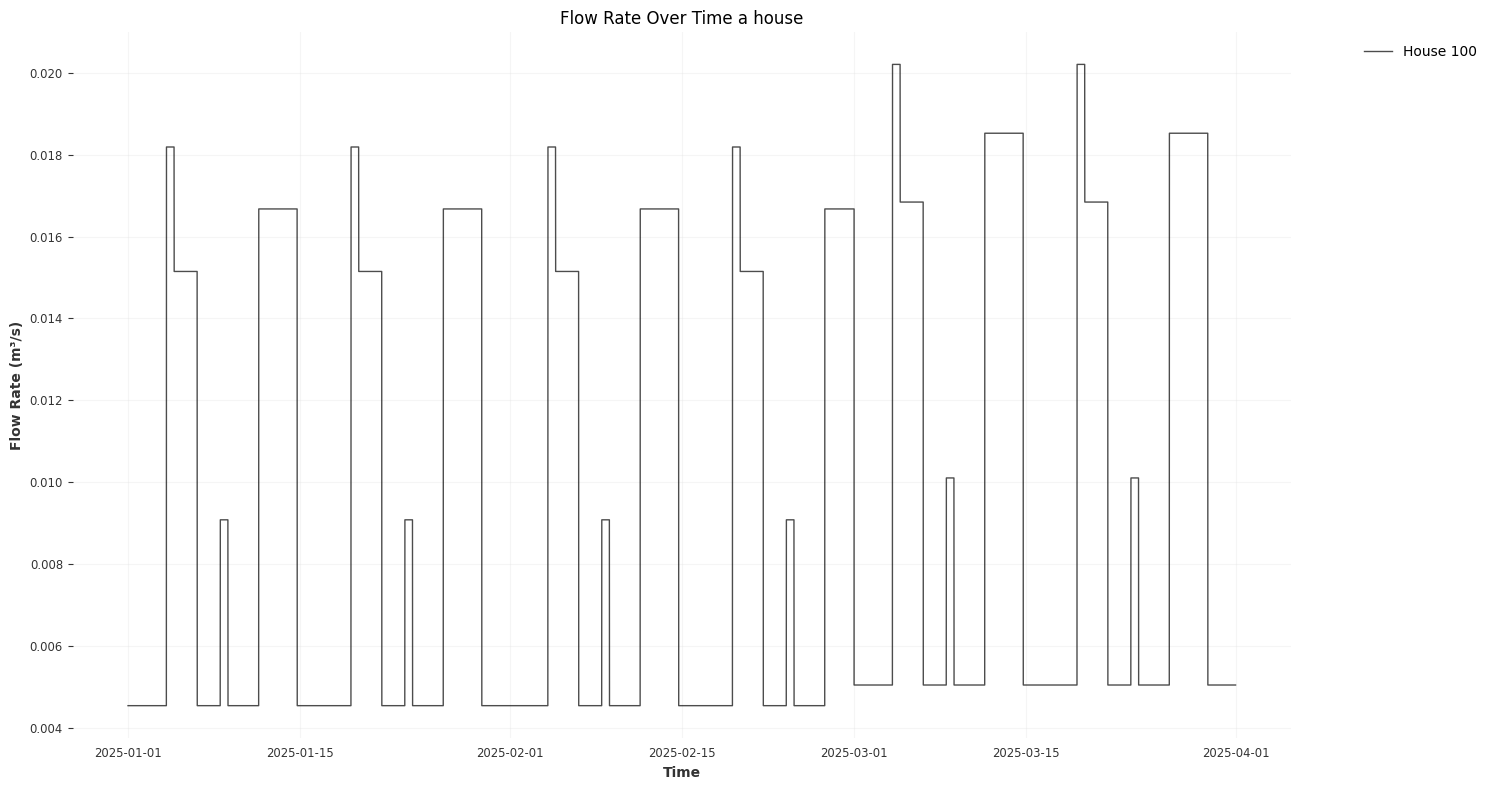

Selected house IDs: [100]


In [171]:
houses = [100]

# Create the plot
plt.figure(figsize=(15, 8))

# Plot flow data for each random house
for house_id in houses:
    house_data = leak_df[leak_df['house_id'] == house_id].copy()
    house_data['timestamp'] = pd.to_datetime(house_data['timestamp'])
    house_data = house_data.sort_values('timestamp')
    
    plt.plot(house_data['timestamp'], house_data['flow_m3_s'], 
             label=f'House {house_id}', alpha=0.7, linewidth=1)

plt.xlabel('Time')
plt.ylabel('Flow Rate (m³/s)')
plt.title('Flow Rate Over Time a house')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the selected house IDs
print(f"Selected house IDs: {sorted(houses)}")

# TCN development

In [172]:
feat_eng_df = leak_df.copy()

In [173]:
# Defining features and targets
NUMERICAL_FEATURES_v1 = [
    'velocity_m_per_s', 'flow_m3_s', 'upstream_transit_time_s', 
    'downstream_transit_time_s', 'delta_t_ns', 'pipe_width_in',
    'od_mm', 'wall_mm', 'id_mm', 'c_est_m_per_s', 'temp_est_c'
]

CATEGORICAL_FEATURES_v1 = [
    'pipe_material', 'leak_type', 'leak_category', 'leak_pipe'
]

TARGET_COLUMNS = ['pipe_burst_leak', 'leak_branch']

In [174]:
missing_numerical = [col for col in NUMERICAL_FEATURES_v1 if col not in feat_eng_df.columns]
missing_categorical = [col for col in CATEGORICAL_FEATURES_v1 if col not in feat_eng_df.columns]
missing_targets = [col for col in TARGET_COLUMNS if col not in feat_eng_df.columns]

if missing_numerical:
    print(f"Missing numerical features: {missing_numerical}")
if missing_categorical:
    print(f"Missing categorical features: {missing_categorical}")
if missing_targets:
    print(f"Missing target columns: {missing_targets}")

### One-hot encoding

In [175]:
def create_feature_encodings(df):
    """Create one-hot encodings for categorical features"""
    df_encoded = df.copy()
    
    # One-hot encode categorical features
    for cat_feature in CATEGORICAL_FEATURES_v1:
        if cat_feature in df_encoded.columns:
            # Get unique values
            unique_vals = df_encoded[cat_feature].unique()
            print(f"{cat_feature} unique values: {unique_vals}")
            
            # Create one-hot encoding
            encoded_cols = pd.get_dummies(df_encoded[cat_feature], 
                                        prefix=f'{cat_feature}_onehot', 
                                        prefix_sep='_')
            
            # Add encoded columns to dataframe
            df_encoded = pd.concat([df_encoded, encoded_cols], axis=1)
            
            print(f"Created {len(encoded_cols.columns)} columns for {cat_feature}")
    
    return df_encoded

In [176]:
feat_eng_df = create_feature_encodings(feat_eng_df)
feat_eng_df.head()

pipe_material unique values: ['Copper' 'PEX']
Created 2 columns for pipe_material
leak_type unique values: ['none' 'burst_freeze' 'gradual' 'micro' 'burst_pressure']
Created 5 columns for leak_type
leak_category unique values: ['none' 'laundry' 'faucet' 'toilet' 'shower' 'unknown' 'dish']
Created 7 columns for leak_category
leak_pipe unique values: ['none' 'P_LAUNDRY' 'P_HOSE_FRONT' 'P_WATER_HEATER' 'P_HOSE_BACK'
 'P_FAM_WC' 'P_FAM_TUB' 'P_FAM_LAV' 'P_UPPER_BRANCH' 'P_POWDER_BRANCH'
 'P_POWDER_WC' 'P_DISHWASHER' 'P_ENS_LAV' 'P_MAIN_1' 'P_POWDER_LAV'
 'P_ENS_SHWR' 'P_ENS_WC' 'P_MAIN_2' 'P_KITCHEN_BRANCH' 'P_KITCHEN_SINK']
Created 20 columns for leak_pipe


,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_pipe_onehot_P_KITCHEN_SINK,leak_pipe_onehot_P_LAUNDRY,leak_pipe_onehot_P_MAIN_1,leak_pipe_onehot_P_MAIN_2,leak_pipe_onehot_P_POWDER_BRANCH,leak_pipe_onehot_P_POWDER_LAV,leak_pipe_onehot_P_POWDER_WC,leak_pipe_onehot_P_UPPER_BRANCH,leak_pipe_onehot_P_WATER_HEATER,leak_pipe_onehot_none
0,2025-01-01T00:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,False,False,False,False,False,False,False,True
1,2025-01-01T00:15:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,False,False,False,False,False,False,False,True
2,2025-01-01T00:30:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,False,False,False,False,False,False,False,True
3,2025-01-01T00:45:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,False,False,False,False,False,False,False,True
4,2025-01-01T01:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,False,False,False,False,False,False,False,True


In [177]:
def prepare_categorical_targets(df, target_cols):
    """Prepare both binary and categorical targets"""
    df_targets = df.copy()
    
    for target_col in target_cols:
        if target_col in df_targets.columns:
            unique_vals = df_targets[target_col].unique()
            
            if target_col == 'pipe_burst_leak':
                # Binary target - keep as is (boolean/binary)
                print(f"{target_col}: Binary target, keeping as boolean")
                
            elif target_col == 'leak_branch':
                # Categorical target - we have options:
                print(f"{target_col} unique values: {unique_vals}")
                
                # One-hot encode for multi-output
                target_encoded = pd.get_dummies(df_targets[target_col], 
                                              prefix=f'{target_col}_onehot', 
                                              prefix_sep='_')
                df_targets = pd.concat([df_targets, target_encoded], axis=1)
                print(f"One-hot encoded {target_col}: {target_encoded.columns.tolist()}")
    
    return df_targets

In [178]:
feat_eng_df = prepare_categorical_targets(feat_eng_df, TARGET_COLUMNS)
feat_eng_df.head()

pipe_burst_leak: Binary target, keeping as boolean
leak_branch unique values: ['none' 'MAIN_TRUNK_2' 'MAIN_TRUNK_1' 'UPPER_FLOOR_BRANCH' 'unknown'
 'POWDER_ROOM_BRANCH' 'KITCHEN_BRANCH']
One-hot encoded leak_branch: ['leak_branch_onehot_KITCHEN_BRANCH', 'leak_branch_onehot_MAIN_TRUNK_1', 'leak_branch_onehot_MAIN_TRUNK_2', 'leak_branch_onehot_POWDER_ROOM_BRANCH', 'leak_branch_onehot_UPPER_FLOOR_BRANCH', 'leak_branch_onehot_none', 'leak_branch_onehot_unknown']


,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_pipe_onehot_P_UPPER_BRANCH,leak_pipe_onehot_P_WATER_HEATER,leak_pipe_onehot_none,leak_branch_onehot_KITCHEN_BRANCH,leak_branch_onehot_MAIN_TRUNK_1,leak_branch_onehot_MAIN_TRUNK_2,leak_branch_onehot_POWDER_ROOM_BRANCH,leak_branch_onehot_UPPER_FLOOR_BRANCH,leak_branch_onehot_none,leak_branch_onehot_unknown
0,2025-01-01T00:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,True,False,False,False,False,False,True,False
1,2025-01-01T00:15:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,True,False,False,False,False,False,True,False
2,2025-01-01T00:30:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,True,False,False,False,False,False,True,False
3,2025-01-01T00:45:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,True,False,False,False,False,False,True,False
4,2025-01-01T01:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,False,False,True,False,False,False,False,False,True,False


In [179]:
feat_eng_df.columns.tolist()


['timestamp',
 'house_id',
 'velocity_m_per_s',
 'flow_m3_s',
 'flow_gpm',
 'upstream_transit_time_s',
 'downstream_transit_time_s',
 'delta_t_ns',
 'pressure_psi',
 'pipe_material',
 'pipe_width_in',
 'od_mm',
 'wall_mm',
 'id_mm',
 'l_path_m',
 'pipe_burst_leak',
 'leak_type',
 'leak_category',
 'leak_branch',
 'leak_pipe',
 'c_est_m_per_s',
 'temp_est_c',
 'n_traverses',
 'theta_deg',
 'V_est',
 'Q_est',
 'velocity_error',
 'flow_rate_error',
 'velocity_error_pass',
 'flow_rate_error_pass',
 'pipe_material_onehot_Copper',
 'pipe_material_onehot_PEX',
 'leak_type_onehot_burst_freeze',
 'leak_type_onehot_burst_pressure',
 'leak_type_onehot_gradual',
 'leak_type_onehot_micro',
 'leak_type_onehot_none',
 'leak_category_onehot_dish',
 'leak_category_onehot_faucet',
 'leak_category_onehot_laundry',
 'leak_category_onehot_none',
 'leak_category_onehot_shower',
 'leak_category_onehot_toilet',
 'leak_category_onehot_unknown',
 'leak_pipe_onehot_P_DISHWASHER',
 'leak_pipe_onehot_P_ENS_LAV',
 

### Forward shifting targets - not to be fed into TCN, just helpful labels for us in the data

In [180]:
# To fix, not working as intended
def create_supervised_learning_targets(df, forecast_horizon: int = 24):
    """
    Create supervised learning targets for the TCN model. Currently, this 
    creates a prediction if there will be any leaks in the next 24 hours.
    """
    
    df_with_targets = df.copy()
    df_with_targets["timestamp"] = pd.to_datetime(df_with_targets["timestamp"])
    df_with_targets = df_with_targets.sort_values(["house_id", "timestamp"])
    
    future_targets = []
    
    for house_id in df_with_targets["house_id"].unique():
        house_data = df_with_targets[df_with_targets["house_id"] == house_id].copy()
        
        # Rolling window - predict if leak occurs anywhere in next 24 hours
        house_data["pipe_burst_leak_next_24h"] = (
            house_data["pipe_burst_leak"]
            .rolling(window=forecast_horizon, min_periods=1)
            .max()
            .shift(-forecast_horizon + 1)
            .fillna(False)
            .astype(bool)
        )
        
        onehot_cols = [col for col in house_data.columns if col.startswith("leak_branch_onehot_")]
        
        for col in onehot_cols:
            # Only mark branch as True if leak happens on that specific branch
            leak_on_this_branch = (house_data[col] & house_data["pipe_burst_leak"])
            
            house_data[f"{col}_next_24h"] = (
                leak_on_this_branch
                .rolling(window=forecast_horizon, min_periods=1)
                .max()
                .shift(-forecast_horizon + 1)
                .fillna(False)
                .astype(bool)
            )
        
        # Handle "none" case - True only when no leak predicted at all
        none_flag = f"leak_branch_onehot_none_next_24h"
        if none_flag in house_data.columns:
            house_data[none_flag] = (
                house_data["pipe_burst_leak_next_24h"] == False
            )
        
        future_targets.append(house_data)
    
    return pd.concat(future_targets, axis=0, ignore_index=True).dropna(
        subset=["pipe_burst_leak_next_24h"]
    )

In [181]:
feat_eng_df = create_supervised_learning_targets(feat_eng_df)
feat_eng_df.head()

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h
0,2025-01-01 00:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
1,2025-01-01 00:15:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
2,2025-01-01 00:30:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
3,2025-01-01 00:45:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
4,2025-01-01 01:00:00,1,2.4,0.00476,75.447525,0.000061,0.00006,-100.334228,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False


In [182]:
feat_eng_df[(feat_eng_df['pipe_burst_leak_next_24h'] == True) & (feat_eng_df['leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h'] == True)]

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h
33707,2025-03-23 00:00:00,4,2.4,0.004942,78.332291,0.000061,0.00006,-100.334346,-106.244522,Copper,...,True,False,True,False,False,False,True,False,False,False
33708,2025-03-23 00:15:00,4,2.4,0.004942,78.332291,0.000061,0.00006,-100.334346,-106.244522,Copper,...,True,False,True,False,False,False,True,False,False,False
33709,2025-03-23 00:30:00,4,2.4,0.004942,78.332291,0.000061,0.00006,-100.334346,-106.244522,Copper,...,True,False,True,False,False,False,True,False,False,False
33710,2025-03-23 00:45:00,4,2.4,0.004942,78.332291,0.000061,0.00006,-100.334346,-106.244522,Copper,...,True,False,True,False,False,False,True,False,False,False
33711,2025-03-23 01:00:00,4,2.4,0.004942,78.332291,0.000061,0.00006,-100.334346,-106.244522,Copper,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849561,2025-01-27 12:45:00,99,3.0,0.013972,221.460678,0.000060,0.00006,-124.735382,-715.623962,PEX,...,False,False,True,False,False,False,True,False,False,False
849562,2025-01-27 13:00:00,99,3.0,0.013972,221.460678,0.000060,0.00006,-124.735382,-715.623962,PEX,...,False,False,True,False,False,False,True,False,False,False
849563,2025-01-27 13:15:00,99,3.0,0.013972,221.460678,0.000060,0.00006,-124.735382,-715.623962,PEX,...,False,False,True,False,False,False,True,False,False,False
849564,2025-01-27 13:30:00,99,3.0,0.013972,221.460678,0.000060,0.00006,-124.735382,-715.623962,PEX,...,False,False,True,False,False,False,True,False,False,False


In [183]:
leak_branch_24h_cols = [col for col in feat_eng_df.columns if col.startswith('leak_branch_onehot_') and col.endswith('_next_24h')]
feat_eng_df[(feat_eng_df['pipe_burst_leak_next_24h']) & (feat_eng_df[leak_branch_24h_cols].eq(False).any(axis=1))]

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h
8643,2025-01-01 00:00:00,2,2.4,0.004648,73.672295,0.000061,0.00006,-100.334160,-88.393990,Copper,...,True,False,True,False,False,True,False,False,False,False
8644,2025-01-01 00:15:00,2,2.4,0.004648,73.672295,0.000061,0.00006,-100.334160,-88.393990,Copper,...,True,False,True,False,False,True,False,False,False,False
8645,2025-01-01 00:30:00,2,2.4,0.004648,73.672295,0.000061,0.00006,-100.334160,-88.393990,Copper,...,False,False,True,False,False,True,False,False,False,False
8646,2025-01-01 00:45:00,2,2.4,0.004648,73.672295,0.000061,0.00006,-100.334160,-88.393990,Copper,...,False,False,True,False,False,True,False,False,False,False
8647,2025-01-01 01:00:00,2,2.4,0.004648,73.672295,0.000061,0.00006,-100.334160,-88.393990,Copper,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852977,2025-03-04 02:15:00,99,3.0,0.004228,67.015167,0.000060,0.00006,-124.731743,-24.768465,PEX,...,False,False,True,False,False,False,False,True,False,False
852978,2025-03-04 02:30:00,99,3.0,0.004228,67.015167,0.000060,0.00006,-124.731743,-24.768465,PEX,...,False,False,True,False,False,False,False,True,False,False
852979,2025-03-04 02:45:00,99,3.0,0.004228,67.015167,0.000060,0.00006,-124.731743,-24.768465,PEX,...,False,False,True,False,False,False,False,True,False,False
852980,2025-03-04 03:00:00,99,3.0,0.016926,268.282501,0.000060,0.00006,-124.735382,-1046.407104,PEX,...,False,False,True,False,False,False,False,True,False,False


### Final feature summary

In [184]:
final_df = feat_eng_df.copy()

In [185]:
def summarize_tcn_features_final(df_final):
    """Final summary with target options (updated for _next_24h convention)"""
    
    metadata_cols = ['timestamp', 'house_id'] + CATEGORICAL_FEATURES_v1 + TARGET_COLUMNS
    
    feature_cols = [
        col for col in df_final.columns
        if col not in metadata_cols
        and not col.endswith(('_next_24h', 'pressure_psi'))
        and not col.startswith('leak_branch_onehot_')
        and not col.startswith(('V_est', 'Q_est'))
        and not col.endswith(('_error', '_pass'))
    ]

    onehot_targets = [c for c in df_final.columns
                     if c.startswith('leak_branch_onehot_') and c.endswith('_next_24h')]

    summary = {
        'rows': len(df_final),
        'num_features': len(feature_cols),
        'feature_columns': feature_cols,
        'binary_target': 'pipe_burst_leak_next_24h',
        'categorical_targets': onehot_targets,
        'num_categorical_targets': len(onehot_targets)
    }
    
    print("=== FINAL TCN DATA SUMMARY ===")
    print(f"Rows: {len(df_final):,}")
    print(f"Features: {len(feature_cols)}")
    print("Target options:")
    print("  - Binary: pipe_burst_leak_next_24h")
    print(f"  - Categorical (one-hot): {len(onehot_targets)} columns")
    
    return summary

In [186]:
summarize_tcn_features_final(final_df)

=== FINAL TCN DATA SUMMARY ===
Rows: 864,300
Features: 49
Target options:
  - Binary: pipe_burst_leak_next_24h
  - Categorical (one-hot): 7 columns


{'rows': 864300,
 'num_features': 49,
 'feature_columns': ['velocity_m_per_s',
  'flow_m3_s',
  'flow_gpm',
  'upstream_transit_time_s',
  'downstream_transit_time_s',
  'delta_t_ns',
  'pipe_width_in',
  'od_mm',
  'wall_mm',
  'id_mm',
  'l_path_m',
  'c_est_m_per_s',
  'temp_est_c',
  'n_traverses',
  'theta_deg',
  'pipe_material_onehot_Copper',
  'pipe_material_onehot_PEX',
  'leak_type_onehot_burst_freeze',
  'leak_type_onehot_burst_pressure',
  'leak_type_onehot_gradual',
  'leak_type_onehot_micro',
  'leak_type_onehot_none',
  'leak_category_onehot_dish',
  'leak_category_onehot_faucet',
  'leak_category_onehot_laundry',
  'leak_category_onehot_none',
  'leak_category_onehot_shower',
  'leak_category_onehot_toilet',
  'leak_category_onehot_unknown',
  'leak_pipe_onehot_P_DISHWASHER',
  'leak_pipe_onehot_P_ENS_LAV',
  'leak_pipe_onehot_P_ENS_SHWR',
  'leak_pipe_onehot_P_ENS_WC',
  'leak_pipe_onehot_P_FAM_LAV',
  'leak_pipe_onehot_P_FAM_TUB',
  'leak_pipe_onehot_P_FAM_WC',
  'lea

### Target distribution analysis

In [187]:
# Target Distribution Validation
print("="*60)
print("TARGET DISTRIBUTION VALIDATION")
print("="*60)

# 1. OVERALL LEAK STATISTICS
print("\n1. OVERALL LEAK STATISTICS")
print("-"*40)

total_samples = len(final_df)
leak_samples = final_df['pipe_burst_leak'].sum()
leak_rate = leak_samples / total_samples

print(f"Total samples: {total_samples:,}")
print(f"Leak samples: {leak_samples:,}")
print(f"No-leak samples: {total_samples - leak_samples:,}")
print(f"Overall leak rate: {leak_rate:.4f} ({leak_rate*100:.2f}%)")
print(f"Class imbalance ratio: {(total_samples - leak_samples) / leak_samples:.1f}:1 (no-leak:leak)")

# 2. PER-HOUSE LEAK DISTRIBUTION
print("\n2. PER-HOUSE LEAK DISTRIBUTION")
print("-"*40)

house_leak_stats = []
for house_id in sorted(final_df['house_id'].unique()):
    house_data = final_df[final_df['house_id'] == house_id]
    house_total = len(house_data)
    house_leaks = house_data['pipe_burst_leak'].sum()
    house_leak_rate = house_leaks / house_total if house_total > 0 else 0
    
    house_leak_stats.append({
        'house_id': house_id,
        'total_samples': house_total,
        'leak_samples': house_leaks,
        'leak_rate': house_leak_rate
    })

house_stats_df = pd.DataFrame(house_leak_stats)

print(f"Houses with leaks: {(house_stats_df['leak_samples'] > 0).sum()}")
print(f"Houses without leaks: {(house_stats_df['leak_samples'] == 0).sum()}")
print(f"Average leak rate per house: {house_stats_df['leak_rate'].mean():.4f}")
print(f"Std leak rate per house: {house_stats_df['leak_rate'].std():.4f}")
print(f"Min leak rate: {house_stats_df['leak_rate'].min():.4f}")
print(f"Max leak rate: {house_stats_df['leak_rate'].max():.4f}")

# 3. LEAK RATE THRESHOLD ANALYSIS (20%)
print("\n3. LEAK RATE THRESHOLD ANALYSIS (20%)")
print("-"*40)

threshold = 0.15  # 20%
houses_over_threshold = house_stats_df[house_stats_df['leak_rate'] > threshold]
houses_at_or_below_threshold = house_stats_df[house_stats_df['leak_rate'] <= threshold]

print(f"Houses with leak rate > 15%: {len(houses_over_threshold)}")
print(f"Houses with leak rate ≤ 15%: {len(houses_at_or_below_threshold)}")
print(f"Percentage of houses > 15%: {len(houses_over_threshold) / len(house_stats_df) * 100:.2f}%")
print(f"Percentage of houses ≤ 15%: {len(houses_at_or_below_threshold) / len(house_stats_df) * 100:.2f}%")

# Show houses with highest leak rates
print(f"\nTop 10 houses by leak rate:")
top_leak_houses = house_stats_df.nlargest(10, 'leak_rate')
for _, row in top_leak_houses.iterrows():
    print(f"House {row['house_id']}: {row['leak_samples']}/{row['total_samples']} = {row['leak_rate']:.4f}")

# Show houses over 20% threshold
if len(houses_over_threshold) > 0:
    print(f"\nHouses with leak rate > 15%:")
    for _, row in houses_over_threshold.iterrows():
        print(f"House {row['house_id']}: {row['leak_samples']}/{row['total_samples']} = {row['leak_rate']:.4f}")
else:
    print(f"\nNo houses have leak rate > 15%")

# 4. CREATE FILTERED DATAFRAME
print("\n4. CREATE FILTERED DATAFRAME")
print("-"*40)

# Get house IDs to keep (those with leak rate <= threshold)
houses_to_keep = houses_at_or_below_threshold['house_id'].tolist()

# Create filtered DataFrame
ff_df = final_df[final_df['house_id'].isin(houses_to_keep)].copy()

print(f"Original dataset size: {len(final_df):,} rows")
print(f"Filtered dataset size: {len(ff_df):,} rows")
print(f"Removed {len(final_df) - len(ff_df):,} rows")
print(f"Removed {len(houses_over_threshold)} houses with leak rate > {threshold*100}%")

# Verify the filtering worked correctly
print(f"\nVerification:")
print(f"Remaining houses: {ff_df['house_id'].nunique()}")
print(f"Removed houses: {len(houses_over_threshold)}")

# Check leak rate in filtered dataset
filtered_total = len(ff_df)
filtered_leaks = ff_df['pipe_burst_leak'].sum()
filtered_leak_rate = filtered_leaks / filtered_total if filtered_total > 0 else 0

print(f"Filtered dataset leak rate: {filtered_leak_rate:.4f} ({filtered_leak_rate*100:.2f}%)")
print(f"Original dataset leak rate: {leak_rate:.4f} ({leak_rate*100:.2f}%)")

TARGET DISTRIBUTION VALIDATION

1. OVERALL LEAK STATISTICS
----------------------------------------
Total samples: 864,300
Leak samples: 73,769
No-leak samples: 790,531
Overall leak rate: 0.0854 (8.54%)
Class imbalance ratio: 10.7:1 (no-leak:leak)

2. PER-HOUSE LEAK DISTRIBUTION
----------------------------------------
Houses with leaks: 47
Houses without leaks: 53
Average leak rate per house: 0.0854
Std leak rate per house: 0.2551
Min leak rate: 0.0000
Max leak rate: 1.0000

3. LEAK RATE THRESHOLD ANALYSIS (20%)
----------------------------------------
Houses with leak rate > 15%: 7
Houses with leak rate ≤ 15%: 93
Percentage of houses > 15%: 7.00%
Percentage of houses ≤ 15%: 93.00%

Top 10 houses by leak rate:
House 13.0: 8643.0/8643.0 = 1.0000
House 19.0: 8643.0/8643.0 = 1.0000
House 25.0: 8643.0/8643.0 = 1.0000
House 36.0: 8643.0/8643.0 = 1.0000
House 70.0: 8643.0/8643.0 = 1.0000
House 78.0: 8643.0/8643.0 = 1.0000
House 92.0: 8643.0/8643.0 = 1.0000
House 65.0: 1195.0/8643.0 = 0.1383

### Features and targets

In [188]:
FEATURES = [
    'velocity_m_per_s', 'flow_m3_s', 'flow_gpm', 'upstream_transit_time_s',
    'downstream_transit_time_s', 'delta_t_ns', 'pipe_width_in', 'od_mm',
    'wall_mm', 'id_mm', 'l_path_m', 'c_est_m_per_s', 'temp_est_c',
    'n_traverses', 'theta_deg', 'pipe_material_onehot_Copper',
    'pipe_material_onehot_PEX', 'leak_type_onehot_burst_freeze',
    'leak_type_onehot_burst_pressure', 'leak_type_onehot_gradual',
    'leak_type_onehot_micro', 'leak_type_onehot_none',
    'leak_category_onehot_dish', 'leak_category_onehot_faucet',
    'leak_category_onehot_laundry', 'leak_category_onehot_none',
    'leak_category_onehot_shower', 'leak_category_onehot_toilet',
    'leak_category_onehot_unknown', 'leak_pipe_onehot_P_DISHWASHER',
    'leak_pipe_onehot_P_ENS_LAV', 'leak_pipe_onehot_P_ENS_SHWR',
    'leak_pipe_onehot_P_ENS_WC', 'leak_pipe_onehot_P_FAM_LAV',
    'leak_pipe_onehot_P_FAM_TUB', 'leak_pipe_onehot_P_FAM_WC',
    'leak_pipe_onehot_P_HOSE_BACK', 'leak_pipe_onehot_P_HOSE_FRONT',
    'leak_pipe_onehot_P_KITCHEN_BRANCH', 'leak_pipe_onehot_P_KITCHEN_SINK',
    'leak_pipe_onehot_P_LAUNDRY', 'leak_pipe_onehot_P_MAIN_1',
    'leak_pipe_onehot_P_MAIN_2', 'leak_pipe_onehot_P_POWDER_BRANCH',
    'leak_pipe_onehot_P_POWDER_LAV', 'leak_pipe_onehot_P_POWDER_WC',
    'leak_pipe_onehot_P_UPPER_BRANCH', 'leak_pipe_onehot_P_WATER_HEATER',
    'leak_pipe_onehot_none'
]

In [189]:
TARGETS = [
    'pipe_burst_leak_next_24h',
    'leak_branch_onehot_KITCHEN_BRANCH_next_24h',
    'leak_branch_onehot_MAIN_TRUNK_1_next_24h',
    'leak_branch_onehot_MAIN_TRUNK_2_next_24h',
    'leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h',
    'leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h',
    'leak_branch_onehot_none_next_24h',
    'leak_branch_onehot_unknown_next_24h'
    ]

### Scaling

In [190]:
from sklearn.preprocessing import StandardScaler

def scale_features_simple(df):
    """Simple sklearn-based scaling for numerical features"""
    df_scaled = df.copy()
    
    # Separate numerical and one-hot features
    numerical_features = [
        'velocity_m_per_s', 'flow_m3_s', 'flow_gpm', 'upstream_transit_time_s',
        'downstream_transit_time_s', 'delta_t_ns', 'pipe_width_in', 'od_mm',
        'wall_mm', 'id_mm', 'l_path_m', 'c_est_m_per_s', 'temp_est_c',
        'n_traverses', 'theta_deg'
    ]
    
    # Fit scaler on numerical features
    scaler = StandardScaler()
    df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
    
    # Show scaling stats
    for col in numerical_features[:5]:
        print(f"{col}: mean={df_scaled[col].mean():.3f}, std={df_scaled[col].std():.3f}")
    
    return df_scaled, scaler

In [191]:
ff_scaled, feature_scaler = scale_features_simple(ff_df)

velocity_m_per_s: mean=-0.000, std=1.000
flow_m3_s: mean=-0.000, std=1.000
flow_gpm: mean=-0.000, std=1.000
upstream_transit_time_s: mean=0.000, std=1.000
downstream_transit_time_s: mean=-0.000, std=1.000


In [192]:
ff_scaled.head()

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h
0,2025-01-01 00:00:00,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
1,2025-01-01 00:15:00,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
2,2025-01-01 00:30:00,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
3,2025-01-01 00:45:00,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
4,2025-01-01 01:00:00,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False


### Darts timeseries objects

In [193]:
dupes_mask = ff_scaled.duplicated(subset=['house_id', 'timestamp'], keep=False)

# 2. How many duplicates overall?
print(f"Total duplicate rows: {dupes_mask.sum():,}")

# 3. Count duplicates per house (only the problematic ones)
dupes_per_house = (
    ff_scaled.loc[dupes_mask, ['house_id', 'timestamp']]
    .groupby('house_id')
    .size()
    .sort_values(ascending=False)
)

print("\nTop houses with duplicate timestamps:")
print(dupes_per_house.head(10))

# 4. Inspect a specific house to verify:
sample_house = dupes_per_house.index[0] if not dupes_per_house.empty else None
if sample_house is not None:
    display(
        ff_scaled[ff_scaled['house_id'] == sample_house]
        .loc[lambda d: d.duplicated(subset='timestamp', keep=False)]
        .sort_values('timestamp')
        .head(20)
    )

Total duplicate rows: 372

Top houses with duplicate timestamps:
house_id
1     4
64    4
74    4
73    4
72    4
71    4
69    4
68    4
67    4
66    4
dtype: int64


,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h
2976,2025-02-01,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
2977,2025-02-01,1,-0.947607,-0.739805,-0.739805,-0.854127,-0.852966,1.165423,-95.084198,Copper,...,True,False,False,False,False,False,False,False,True,False
5665,2025-03-01,1,-0.947607,1.459362,1.459362,-0.854061,-0.852900,1.165331,-1663.685303,Copper,...,True,False,False,False,False,False,False,False,True,False
5666,2025-03-01,1,-0.947607,-0.647769,-0.647769,-0.854118,-0.852956,1.165410,-128.704987,Copper,...,True,False,False,False,False,False,False,False,True,False


In [194]:
dup_df = ff_scaled.copy()
before = len(dup_df)

dup_df = (
    dup_df
    .sort_values(['house_id', 'timestamp'])
    .drop_duplicates(subset=['house_id', 'timestamp'],
                     keep='first')
    .reset_index(drop=True)
)

after = len(dup_df)
print(f"Removed {before - after:,} duplicate rows "
      f"({before:,} → {after:,})")

Removed 186 duplicate rows (803,799 → 803,613)


In [195]:
df_ts = dup_df.copy()
drop_cols = FEATURES + TARGETS
df_ts[df_ts[drop_cols].isna().any(axis=1)]

,timestamp,house_id,velocity_m_per_s,flow_m3_s,flow_gpm,upstream_transit_time_s,downstream_transit_time_s,delta_t_ns,pressure_psi,pipe_material,...,leak_branch_onehot_none,leak_branch_onehot_unknown,pipe_burst_leak_next_24h,leak_branch_onehot_KITCHEN_BRANCH_next_24h,leak_branch_onehot_MAIN_TRUNK_1_next_24h,leak_branch_onehot_MAIN_TRUNK_2_next_24h,leak_branch_onehot_POWDER_ROOM_BRANCH_next_24h,leak_branch_onehot_UPPER_FLOOR_BRANCH_next_24h,leak_branch_onehot_none_next_24h,leak_branch_onehot_unknown_next_24h


In [196]:
# Drop any remaining NaNs in features/targets only
df_ts = df_ts.dropna(subset=drop_cols)

# Sort by house_id and timestamp
df_ts['timestamp'] = pd.to_datetime(df_ts['timestamp'])
df_ts = df_ts.sort_values(['house_id', 'timestamp'])

# Convert targets to float32 for probability modelling
df_ts[TARGETS] = df_ts[TARGETS].astype("float32")

In [197]:
df_ts.shape

(803613, 79)

In [198]:
# Building a series per house
house_feature_series   = {} # id -> TimeSeries of covariates
house_target_series    = {} # id -> TimeSeries of targetsv

In [199]:
for hid, group in df_ts.groupby('house_id', sort=False):
    # Time is the index
    group = group.set_index('timestamp', drop=False)
    
    # Features
    feat_ts = TimeSeries.from_dataframe(
        group,
        time_col='timestamp',
        value_cols=FEATURES,
        freq='15min',
    ).with_static_covariates(pd.DataFrame({'house_id':[hid]}))
    
    # Targets
    targ_ts = TimeSeries.from_dataframe(
        group,
        time_col='timestamp',
        value_cols=TARGETS,
        freq='15min',
    ).with_static_covariates(pd.DataFrame({'house_id':[hid]}))
    
    # Store
    house_feature_series[hid] = feat_ts
    house_target_series[hid]  = targ_ts

print(f"Built {len(house_feature_series)} house TimeSeries objects")

Built 93 house TimeSeries objects


### Cross validation

In [200]:
# Core libraries
import time, gc, json, warnings
import numpy as np
from sklearn.model_selection import GroupKFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score

# Darts
from darts.models import TCNModel

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mdawes/miniconda3/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <599F5563-C1C1-3E19-BD5B-D770621A2C3D> /Users/mdawes/miniconda3/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/Users/mdawes/miniconda3/lib/python3.12/lib-dynload/../../libomp.dylib' (no such file), '/Users/mdawes/miniconda3/bin/../lib/libomp.dylib' (no such file)"]


In [ ]:
# Convert the dicts built earlier into reproducible ordered lists
house_ids = np.array(sorted(house_feature_series.keys()))
feat_series_list = [house_feature_series[h] for h in house_ids]
targ_series_list = [house_target_series[h]  for h in house_ids]

print(f"Total houses: {len(house_ids)}")

In [ ]:
# CV configuration
outer_cv = GroupKFold(n_splits=5) 
# inner_cv = TimeSeriesSplit(n_splits=6, test_size=96, gap=96) # Not used

# TCN hyper-parameters
INPUT_CHUNK  = 7 * 96 # 1 week history
OUTPUT_CHUNK = 96 # 24 h forecast horizon
N_EPOCHS     = 50
BATCH_SIZE   = 32
NUM_LAYERS   = 3
NUM_FILTERS  = 64
KERNEL_SIZE  = 3
DILATION     = 2
DROPOUT      = 0.1

In [ ]:
from darts.utils.likelihood_models.torch import BernoulliLikelihood

def run_outer_fold(train_idx, test_idx, fold_no):
    """
    Train on `train_idx` houses, validate on the last OUTPUT_CHUNK of each
    remaining house, and evaluate on `test_idx`.

    Houses whose time-series are shorter than the minimum length required by
    Darts (INPUT_CHUNK + OUTPUT_CHUNK) are skipped (“dropped out”).
    """
    # Gather per-house series lists
    train_feats_outer = [feat_series_list[i] for i in train_idx]
    train_targ_outer  = [targ_series_list[i] for i in train_idx]
    test_feats_outer  = [feat_series_list[i] for i in test_idx]
    test_targ_outer   = [targ_series_list[i] for i in test_idx]

    # Minimum length of the portion fed to model.fit()
    MIN_TRAIN_LEN = INPUT_CHUNK + OUTPUT_CHUNK # 7 days + 24 h = 768

    # Build training / validation sets, dropping houses with too few points
    train_feats, train_targs, val_feats, val_targs = [], [], [], []
    dropped = 0

    for feats_ts, targ_ts in zip(train_feats_outer, train_targ_outer):
        n_points = len(targ_ts)

        # Need MIN_TRAIN_LEN for fitting + OUTPUT_CHUNK for validation chunk
        if n_points < MIN_TRAIN_LEN + OUTPUT_CHUNK:
            dropped += 1
            continue
        
        VAL_WINDOW = INPUT_CHUNK + OUTPUT_CHUNK 
        split_idx = n_points - VAL_WINDOW
        train_feats.append(feats_ts[:split_idx])
        train_targs.append(targ_ts[:split_idx])
        val_feats  .append(feats_ts[split_idx:])
        val_targs  .append(targ_ts[split_idx:])

    if dropped:
        print(f"Dropped {dropped} train houses that were < "
              f"{MIN_TRAIN_LEN + OUTPUT_CHUNK} points long")

    # Define and fit the TCN
    model = TCNModel(
        input_chunk_length = INPUT_CHUNK,
        output_chunk_length = OUTPUT_CHUNK,
        output_chunk_shift = 0,
        likelihood = BernoulliLikelihood(), 
        n_epochs = N_EPOCHS,
        batch_size = BATCH_SIZE,
        num_layers = NUM_LAYERS,
        num_filters = NUM_FILTERS,
        kernel_size = KERNEL_SIZE,
        dilation_base = DILATION,
        dropout = DROPOUT,
        random_state = 42,
    )

    t0 = time.time()
    model.fit(series=train_targs,
              past_covariates=train_feats,
              val_series=val_targs,
              val_past_covariates=val_feats,
              verbose=True)
    fit_secs = time.time() - t0

    # Evaluate
    y_true, y_pred = [], []
    for feats_ts, targ_ts in zip(test_feats_outer, test_targ_outer):
        if len(targ_ts) < INPUT_CHUNK + OUTPUT_CHUNK:
            continue  # nothing to predict safely
        hist = targ_ts[:-OUTPUT_CHUNK]
        future = targ_ts[-OUTPUT_CHUNK:] 

        preds = model.predict(n=OUTPUT_CHUNK,
                              series=hist,
                              past_covariates=feats_ts)

        y_true.extend(future.values()[:, 0]) # first dim = burst_leak flag
        y_pred.extend(preds .values()[:, 0])

    auc = roc_auc_score(y_true, y_pred)
    print(f"Fold {fold_no} AUROC: {auc:.4f}  (fit {fit_secs/60:.1f} min)")

    # Clean-up
    del model
    gc.collect()

    return {"fold": fold_no, "AUROC": auc, "fit_seconds": fit_secs}

In [ ]:
results = []

for fold_no, (train_idx, test_idx) in enumerate(
        outer_cv.split(house_ids, groups=house_ids), start=1):
    print(f"\n===== OUTER FOLD {fold_no}/5 "
          f"— train houses {len(train_idx)}, test houses {len(test_idx)} =====")
    fold_result = run_outer_fold(train_idx, test_idx, fold_no)
    results.append(fold_result)

In [ ]:
print("\n========== CV SUMMARY ==========")
summary_df = pd.DataFrame(results)
display(summary_df)

mean_auc = summary_df['AUROC'].mean()
print(f"\nMean AUROC across folds: {mean_auc:.4f}")

# Optional: save to disk
summary_df.to_json("cv_results.json", orient="records", indent=2)
print("Saved per-fold metrics to cv_results.json")